# CH2. Coding first neuron

### Basic concept first neuron

Training is performed in batches (i.e. giving multiple inputs at the same time to the neuron) to prevent bias towards a single input

In [1]:
import numpy as np
inputs = [1.0, 2.0, 3.0, 2.5]
weights = [[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]
layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


### Concept of matrix product, multiplying row by column vector, transposition of vector

In [2]:
import numpy as np
a = [1, 2, 3]
b = [2, 3, 4]
a = np.array([a])
print(a)
b1 = np.array([b])
b2 = b1.T
np.dot(a, b2)

[[1 2 3]]


array([[20]])

### A single layer of neurons

We supply 1) inputs, 2) weights and 3) biases which determine a prediction.

In [3]:
import numpy as np
inputs = [[1.0, 2.0, 3.0, 2.5],
[2.0, 5.0, -1.0, 2.0],
[-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]
biases = [2.0, 3.0, 0.5]
layer_output1 = np.dot(inputs, np.array(weights).T)
layer_output2 = layer_output1 + biases

print(layer_output2)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


## CH3. Adding hidden layers

In [4]:
import numpy as np
inputs = [[1, 2, 3, 2.5], [2., 5., -1., 2], [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
[0.5, -0.91, 0.26, -0.5],
[-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5],
[-0.5, 0.12, -0.33],
[-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


### Example dataset with different classes

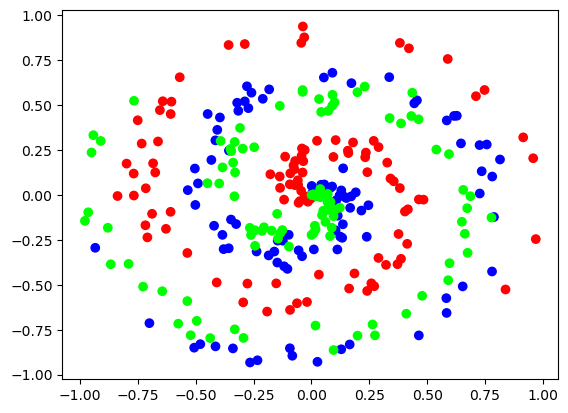

In [13]:
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt

nnfs.init()
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

### Encoding dense layers

Here, we’re setting weights to be random and biases to be 0. Note that we’re initializing weights
to be (inputs, neurons), rather than (neurons, inputs). We’re doing this ahead instead of
transposing every time we perform a forward pass, as explained in the previous chapter. Why zero
biases? In specific scenarios, like with many samples containing values of 0, a bias can ensure
that a neuron fires initially. It sometimes may be appropriate to initialize the biases to some
non-zero number, but the most common initialization for biases is 0. However, in these scenarios,
you may find success in doing things another way. This will vary depending on your use-case and
is just one of many things you can tweak when trying to improve results. One situation where you
might want to try something else is with what’s called dead neurons

In [17]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
            self.output = np.dot(inputs, self.weights) + self.biases

In [18]:
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


## CH4. Activation functions
In general, your neural network will have two types of activation functions. The first will be the
activation function used in hidden layers, and the second will be used in the output layer. The purpose this activation function serves is to mimic a neuron “firing” or “not firing”
based on input information. The simplest version of this is a step function. The problem with a step function is
that it’s less clear to the optimizer what these impacts are because there’s very little information
gathered from this function. It’s either on (1) or off (0). It’s hard to tell how “close” this step
function was to activating or deactivating.

### Sigmoid function

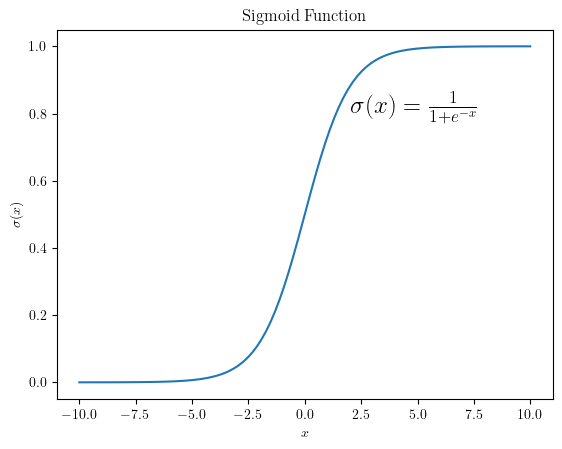

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'$x$')
plt.ylabel(r'$\sigma(x)$')
plt.title(r'Sigmoid Function')

plt.text(2, 0.8, r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', fontsize=18)
plt.show()


### Rectified Linear Activation Function (ReLU)

This simple yet powerful activation function is the most widely used activation function for various reasons — mainly speed and efficiency. While the sigmoid activation
function isn’t the most complicated, it’s still much more challenging to compute than the ReLU
activation function. The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0

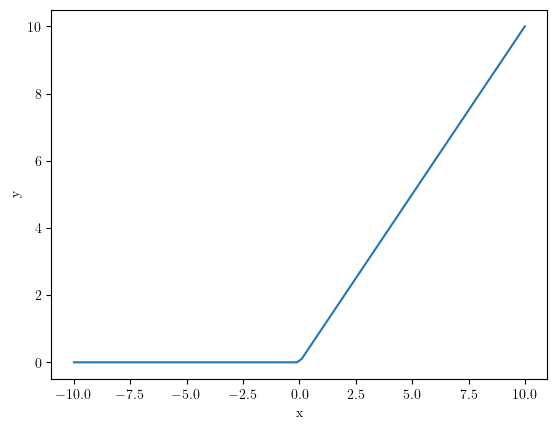

In [40]:
def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-10, 10, 100)

# Compute ReLU values
y = relu(x)

# Plot the ReLU function
plt.plot(x, y)

# Set up LaTeX rendering for text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [53]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

### Softmax activation function
In the case of classification,
what we want to see is a prediction of which class the network “thinks” the input represents. This
distribution returned by the softmax activation function represents confidence scores for each
class and will add up to 1. The predicted class is associated with the output neuron that returned
the largest confidence score. Still, we can also note the other confidence scores in our overarching
algorithm/program that uses this network. For example, if our network has a confidence
distribution for two classes: [0.45, 0.55], the prediction is the 2nd class, but the confidence in this
prediction isn’t very high. Thus, the exponential nature of the softmax activation function is related to **normalization** of the prediction:

$\large \sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K$

In [51]:
layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)
print('exponentiated values:')
print(exp_values)
norm_values = exp_values / np.sum(exp_values)
print('\nnormalized exponentiated values:')
print(norm_values)
print('\nsum of normalized values:', np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]

normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]

sum of normalized values: 0.9999999999999999


In [52]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

### Softmax activation (exponential function) can be a cause of exploding values
Also included a subtraction of the largest of the inputs before we did the
exponentiation. There are two main pervasive challenges with neural networks: “dead neurons”
and very large numbers (referred to as “exploding” values). “Dead” neurons and enormous
numbers can wreak havoc down the line and render a network useless over time. The exponential
function used in softmax activation is one of the sources of exploding values. To prevent this, subtract the largest value from all other functions before normalizing. 

In [57]:
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(f"The output has equal probablities as the initial weights are drawn from a Gaussian distribution:\n")
print(activation2.output[:5])

The output has equal probablities as the initial weights are drawn from a Gaussian distribution:

[[0.33333334 0.33333334 0.33333334]
 [0.3333334  0.33333322 0.3333334 ]
 [0.3333335  0.33333305 0.3333335 ]
 [0.33333352 0.33333296 0.33333352]
 [0.33333358 0.33333287 0.33333358]]


## CH5. Calculating network error with loss

### Categorical cross entropy loss ('negative log function')

Cross-entropy compares two probability distributions, in categorical cross entropy our targets are 'one-hot' in that one of the target values is set to a probability of 1, and the others to 0

$L = \large -\sum_{c=1}^My_{o,c}\log(p_{o,c})$ where y is the target value and p the observed value. 

Applied to an example activation function output **[0.7, 0.1, 0.2]** and targets of **[1, 0, 0]** this becomes simply:

$\large -(1 \cdot \log(0.7) + 1 \cdot \log(0.1) + 0 \cdot \log(0.2))$ which is a special case of cross entropy calculation. However, any terms multiplied by 0 may be ignored in the final calculation. For 'one-hot' vectors, the calculation thus simplifies to: $\large -(1 \cdot \ln(0.7) = 0.36 $. Through the natural logarithm, the CCES outputs a larger loss the lower the confidence is. 

### Evaluting logarithms of 0

The logarithm of 0 or ln(0) is problematic as it's undefined and only in the *limit* of 0, tends to negative infinity. However, limits do not help us in the code here as we would be evaluating 0 directly in the function. To account for this, we clip the data (i.e. subtract and add a small value to the evaluated logarithm) using *np.clip(y_pred, 1e-7, 1 - 1e-7)*

In [60]:
class Loss:
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossentropy(Loss):
        def forward(self, y_pred, y_true):# Number of samples in a batch
            samples = len(y_pred)
            # Clip data to prevent division by 0
            # Clip both sides to not drag mean towards any value
            y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

            if len(y_true.shape) == 1:
                correct_confidences = y_pred_clipped[range(samples), y_true]
            # Mask values - only for one-hot encoded labels
            elif len(y_true.shape) == 2:
                correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

            negative_log_likelihoods = -np.log(correct_confidences)
            return negative_log_likelihoods

In [68]:
#generate sample data, create neurons and apply activation function + loss calculation
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])
loss = loss_function.calculate(activation2.output, y)
print('loss:', loss)

[[0.33333334 0.33333334 0.33333334]
 [0.3333335  0.33333337 0.33333316]
 [0.33333382 0.33333352 0.3333327 ]
 [0.33333394 0.33333352 0.3333325 ]
 [0.33333424 0.33333367 0.33333212]]
loss: 1.0986106


### Calculation of accuracy

While loss is a useful metric for optimizing a model, the metric commonly used in practice along
with loss is the accuracy, which describes how often the largest confidence is the correct class
in terms of a fraction. To handle one-hot encoded targets we convert them to sparse values using *np.argmax()* over the first axis. 

In [78]:
# Calculate accuracy from output of activation2 and targets over the first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)
print('Accuracy:', accuracy)

Accuracy: 0.3333333333333333


## CH6. Introducing optimization

Finding an intelligent way to adjust the neurons’ input’s weights and biases to minimize loss
is the main difficulty of neural networks. One brute force approach is to randomly change the biases and weights until the loss function is minimized. However, even for a simple dataset this would take too long and doesn’t appear to be a reliable method for minimizing the loss. 

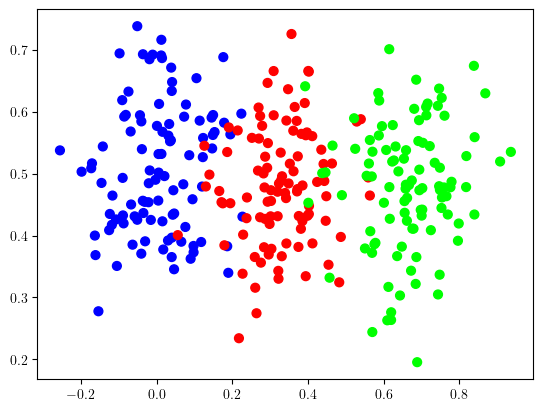

In [80]:
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [83]:
#We can use this data with a simple neural network

dense1 = Layer_Dense(2, 3)  # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)  # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999  # some large initial value which we'll try to decrease
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

### Changing the weights slightly that yield some reduction in loss/accuracy

Instead of pure brute forcing of the parameter search, we can also consider a bit of a refined approach. We start by randomly changing the weights and biases, but when assessing the change in loss or accuracy we continue with a slight change (0.05) in either and asssess again. If the randomly chosen weights/biases did not lead to an improvement, we revert to the previously optimal parameters. 

In [84]:
for iteration in range(10000):

    # Update weights with some small random values
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Perform a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(activation2.output, y)


    # Calculate accuracy from output of activation2 and targets
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,
              'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert weights and biases
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0986265 acc: 0.3333333333333333
New set of weights found, iteration: 8 loss: 1.0984799 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.096971 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.0955564 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0926327 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0911938 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0897386 acc: 0.41333333333333333
New set of weights found, iteration: 22 loss: 1.0828302 acc: 0.6533333333333333
New set of weights found, iteration: 27 loss: 1.0802586 acc: 0.53
New set of weights found, iteration: 33 loss: 1.0782335 acc: 0.3566666666666667
New set of weights found, iteration: 34 loss: 1.0734094 acc: 0.5233333333333333
New set of weights found, iteration: 37 loss: 1.0676796 acc: 0.5666666666666667
New set of weights found, iteration: 38 loss: 1.0625877 

New set of weights found, iteration: 883 loss: 0.19799452 acc: 0.9166666666666666
New set of weights found, iteration: 913 loss: 0.1969082 acc: 0.9166666666666666
New set of weights found, iteration: 920 loss: 0.19645245 acc: 0.9133333333333333
New set of weights found, iteration: 927 loss: 0.19482417 acc: 0.92
New set of weights found, iteration: 937 loss: 0.19396663 acc: 0.92
New set of weights found, iteration: 939 loss: 0.19361983 acc: 0.9233333333333333
New set of weights found, iteration: 940 loss: 0.19343117 acc: 0.9133333333333333
New set of weights found, iteration: 945 loss: 0.1923518 acc: 0.9233333333333333
New set of weights found, iteration: 948 loss: 0.19150434 acc: 0.92
New set of weights found, iteration: 963 loss: 0.19138479 acc: 0.92
New set of weights found, iteration: 970 loss: 0.19084756 acc: 0.92
New set of weights found, iteration: 977 loss: 0.1900305 acc: 0.92
New set of weights found, iteration: 985 loss: 0.18958339 acc: 0.92
New set of weights found, iteration

But this method is still not fast enough to yield appreciable differences quickly. We need a more intelligent method of running the weights and biases. 

## CH9. Backpropagation

In [86]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()


# Dense layer
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation
class Activation_ReLU:

    # Forward pass
    def forward(self, inputs):

        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()

        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation
class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs

        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                            keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                            keepdims=True)

        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):

        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)

        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in \
                enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - \
                              np.dot(single_output, single_output.T)

            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)


# Common loss class
class Loss:

    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):

        # Calculate sample losses
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):

        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]


        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])

        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)


    # Backward pass
    def backward(self, dvalues, y_true):

        # Number of samples
        samples = len(dvalues)

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Perform a forward pass of our training data through this layer
dense1.forward(X)

# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)

# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y)
# Let's see output of the first few samples:
print(loss_activation.output[:5])

# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

# Print accuracy
print('acc:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]
loss: 1.0986104
acc: 0.34
[[ 1.5766357e-04  7.8368583e-05  4.7324400e-05]
 [ 1.8161038e-04  1.1045573e-05 -3.3096312e-05]]
[[-3.60553473e-04  9.66117223e-05 -1.03671395e-04]]
[[ 5.44109462e-05  1.07411419e-04 -1.61822361e-04]
 [-4.07913431e-05 -7.16780924e-05  1.12469446e-04]
 [-5.30112993e-05  8.58172934e-05 -3.28059905e-05]]
[[-1.0729185e-05 -9.4610732e-06  2.0027859e-05]]
